In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os

In [ ]:
# задаем параметры обучения
img_height = 150
img_width = 150
batch_size = 32
num_epochs = 20

In [ ]:
train_directory = "/content/gdrive/MyDrive/датасеты/main_directory/train_directory"
validation_directory = "/content/gdrive/MyDrive/датасеты/main_directory/validation_directory"
test_directory="/content/gdrive/MyDrive/датасеты/main_directory/test_directory"


In [ ]:
# загружаем данные
train_df = tf.keras.preprocessing.image_dataset_from_directory(
  train_directory,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

val_df = tf.keras.preprocessing.image_dataset_from_directory(
  validation_directory,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

test_df = tf.keras.preprocessing.image_dataset_from_directory(
  test_directory,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 862 files belonging to 2 classes.


In [ ]:
# подготавливаем данные для обучения
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
train_df = train_df.map(lambda x, y: (normalization_layer(x), y))
val_df = val_df.map(lambda x, y: (normalization_layer(x), y))
test_df = test_df.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# определяем архитектуру модели
model = tf.keras.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(128, (3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [ ]:
# компилируем модель

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_df,
    validation_data=val_df,
    epochs=num_epochs
)

Epoch 1/20
163/163 [==============================] - 189s 1s/step - loss: 0.2447 - accuracy: 0.8980 - val_loss: 0.2465 - val_accuracy: 0.9375
Epoch 2/20
163/163 [==============================] - 176s 1s/step - loss: 0.1047 - accuracy: 0.9628 - val_loss: 0.3471 - val_accuracy: 0.8750
Epoch 3/20
163/163 [==============================] - 175s 1s/step - loss: 0.0822 - accuracy: 0.9697 - val_loss: 0.3648 - val_accuracy: 0.8750
Epoch 4/20
163/163 [==============================] - 180s 1s/step - loss: 0.0678 - accuracy: 0.9737 - val_loss: 0.1741 - val_accuracy: 0.8750
Epoch 5/20
163/163 [==============================] - 175s 1s/step - loss: 0.0478 - accuracy: 0.9835 - val_loss: 0.2046 - val_accuracy: 0.8750
Epoch 6/20
163/163 [==============================] - 174s 1s/step - loss: 0.0438 - accuracy: 0.9845 - val_loss: 0.2792 - val_accuracy: 0.8750
Epoch 7/20
163/163 [==============================] - 179s 1s/step - loss: 0.0406 - accuracy: 0.9845 - val_loss: 0.1929 - val_accuracy: 0.8750

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# оцениваем качество модели на тестовых данных
test_loss, test_acc = model.evaluate(test_df)
print('Test accuracy:', test_acc)

27/27 [==============================] - 158s 4s/step - loss: 7.7734 - accuracy: 0.6334
Test accuracy: 0.6334106922149658


In [ ]:
# График изменения loss на обучающих и проверочных данных

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# График изменения accuracy на обучающих и проверочных данных
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
# загружаем новое изображение легких и определяем, относится ли оно к здоровым или к пневмонии
img_path = '/content/person341_virus_699(п).jpeg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array = normalization_layer(img_array)
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
  print('Pneumonia')
else:
  print('Healthy')

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Загрузка предварительно обученной модели VGG-16, обученной на наборе данных ImageNet
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Добавление новых слоев, соответствующих задаче классификации легких
x = layers.Flatten()(vgg.output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

In [ ]:
# Сборка модели
model = Model(inputs=vgg.input, outputs=x)

In [ ]:
# Замораживание весов предварительно обученных слоев VGG-16
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Создание генераторов изображений для обучения и валидации модели
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_directory, target_size=(224, 224), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_directory, target_size=(224, 224), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(validation_directory, target_size=(224, 224), batch_size=32, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 862 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
# Обучение модели
new_history = model.fit(train_generator, epochs=5, validation_data=val_generator)

Epoch 1/5
163/163 [==============================] - 2210s 13s/step - loss: 0.3348 - accuracy: 0.8738 - val_loss: 0.7501 - val_accuracy: 0.6875
Epoch 2/5
163/163 [==============================] - 2147s 13s/step - loss: 0.2251 - accuracy: 0.9469 - val_loss: 0.6281 - val_accuracy: 0.7500
Epoch 3/5
163/163 [==============================] - 2146s 13s/step - loss: 0.2054 - accuracy: 0.9555 - val_loss: 0.7947 - val_accuracy: 0.6875
Epoch 4/5
163/163 [==============================] - 2158s 13s/step - loss: 0.1857 - accuracy: 0.9640 - val_loss: 0.3737 - val_accuracy: 0.8125
Epoch 5/5
163/163 [==============================] - 2154s 13s/step - loss: 0.1701 - accuracy: 0.9672 - val_loss: 0.5167 - val_accuracy: 0.6875


In [ ]:
# оцениваем качество модели на тестовых данных
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

27/27 [==============================] - 351s 13s/step - loss: 0.5376 - accuracy: 0.8364
Test accuracy: 0.8364269137382507


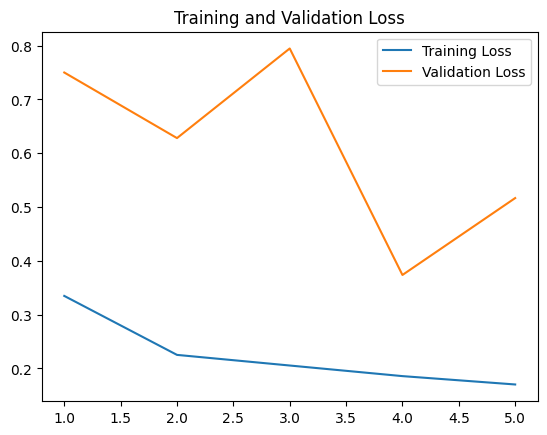

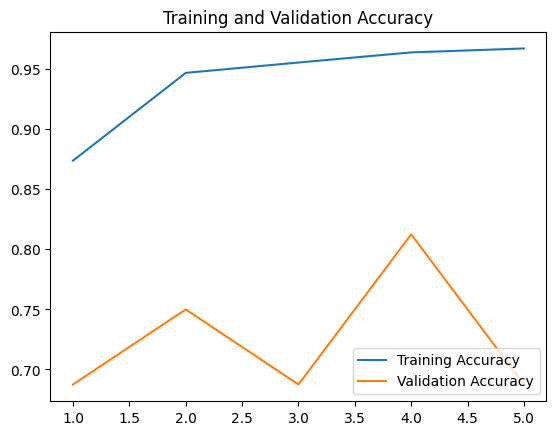

In [ ]:
# График изменения loss на обучающих и проверочных данных
import matplotlib.pyplot as plt
epochs_range = range(1, 6)
train_loss = new_history.history['loss']
val_loss = new_history.history['val_loss']

plt.figure()
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# График изменения accuracy на обучающих и проверочных данных
train_acc = new_history.history['accuracy']
val_acc = new_history.history['val_accuracy']

plt.figure()
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     